In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

df = pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [2]:
print(df.head())
print(df.shape)
print(df.columns)

        Date     Close
0 2010-06-29  1.592667
1 2010-06-30  1.588667
2 2010-07-01  1.464000
3 2010-07-02  1.280000
4 2010-07-06  1.074000
(3236, 2)
Index(['Date', 'Close'], dtype='object')


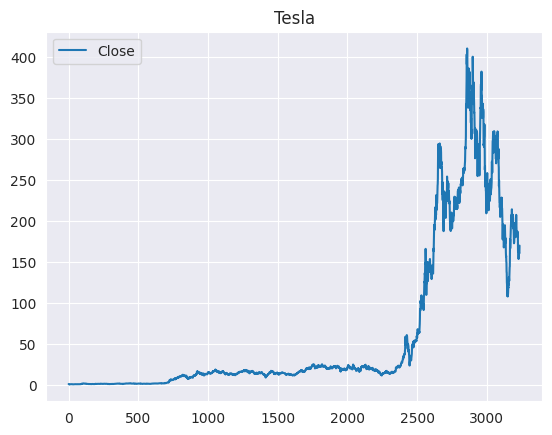

In [3]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

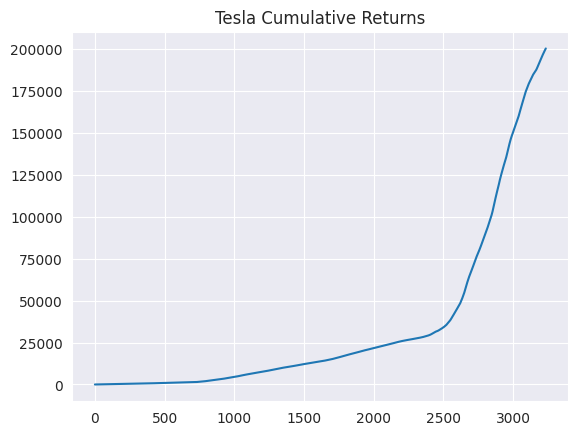

In [4]:
dr = df['Close'].cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

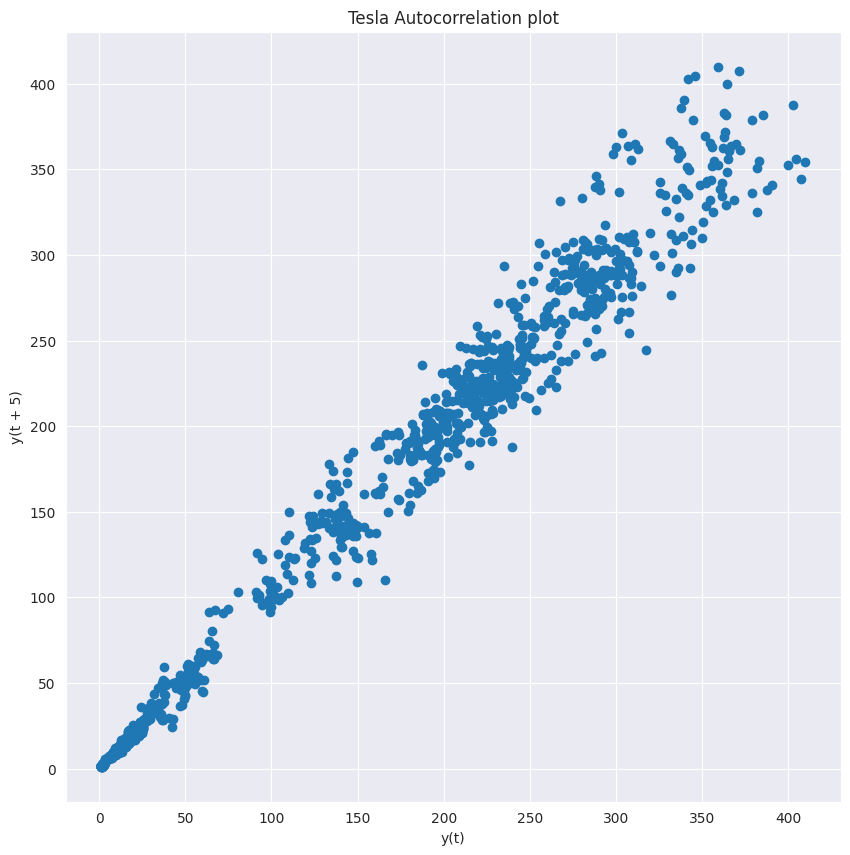

In [5]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('Tesla Autocorrelation plot')

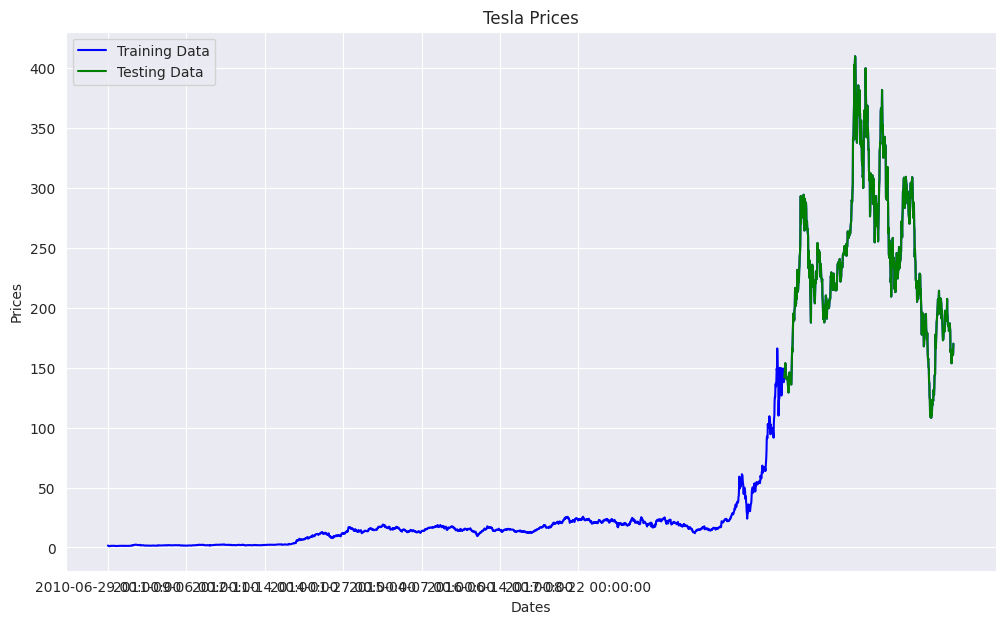

In [6]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [7]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [8]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 95.001
Symmetric mean absolute percentage error: 2.897


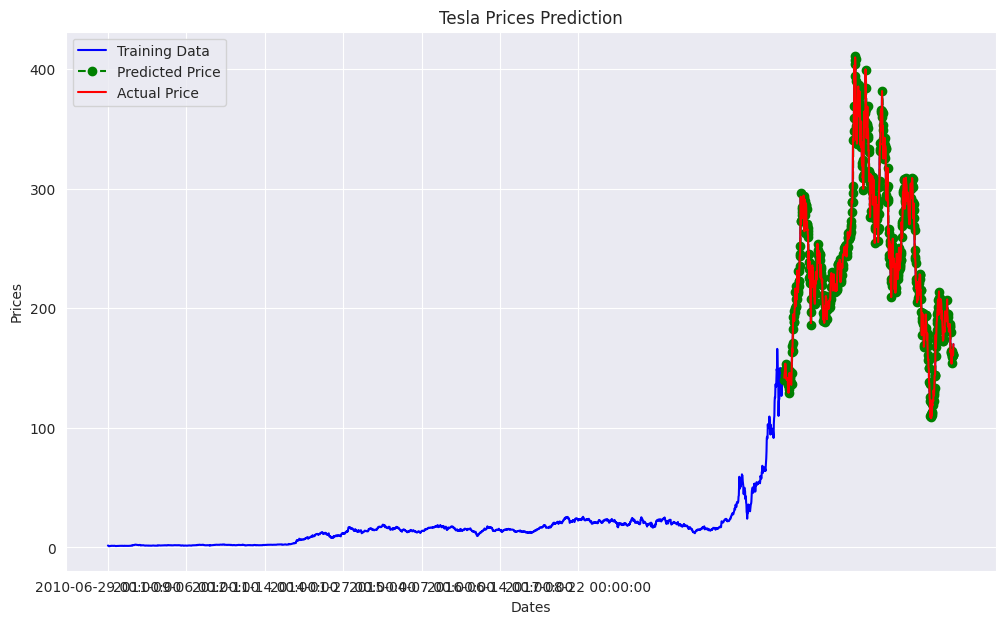

In [9]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

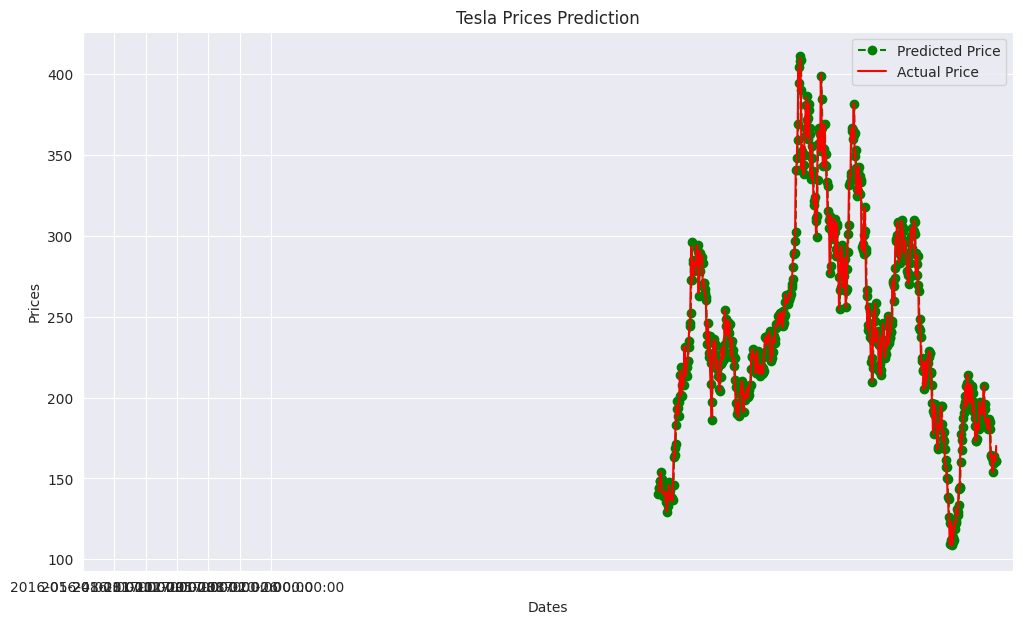

In [10]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.varmax import VARMAX

# fit VARMA model
model = VARMAX(train_data['Close'], order=(1, 1))
results = model.fit()

# make predictions on test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start, end=end, dynamic=True)

# evaluate model
mse = mean_squared_error(test_data['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# plot predictions and actual values
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.legend()
plt.show()

IndexError: tuple index out of range